IMPORTING USEFUL LIBRARIES FOR OUR DATA ANALYSIS AND DATA VISUALIZATION

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
admission = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
admission.shape

(500, 9)

In [4]:
admission.set_index('Serial No.', inplace=True)

In [5]:
admission.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [7]:
admission.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 1 to 500
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 35.2 KB


EDA
---

Exploring the data and finding correlation between different dimensions of the data

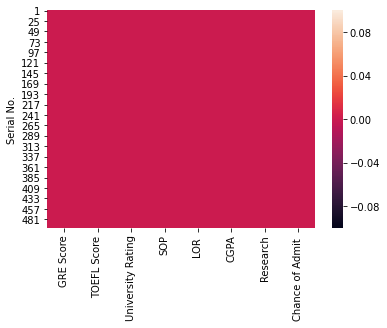

In [8]:
# This gives a heatmap that shows if the dataframe contains any null values.

sns.heatmap(admission.isnull())

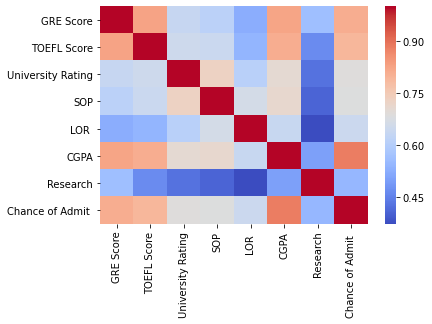

In [9]:
# This shows us correlation between the different attributes of the data

sns.heatmap(admission.corr(), cmap='coolwarm')

From the Heatmap above,

  -  We can see a nice corellation between GRE Score and TOEFL Score, and also a bit of correlation with the CGPA.
     This makes sense because a student with a high CGPA will most likely have similar results in his TOEFL and GRE Examinations.
     
     
  -  We can also see rows with little or no correlation. Like how Letter of Recommendation may have no corrrelation with whether or not you have done research work.
  
  
  - Things like CGPA, TOEFL and GRA Scores have a high correlation with a student's chance of admission and these all makes sense

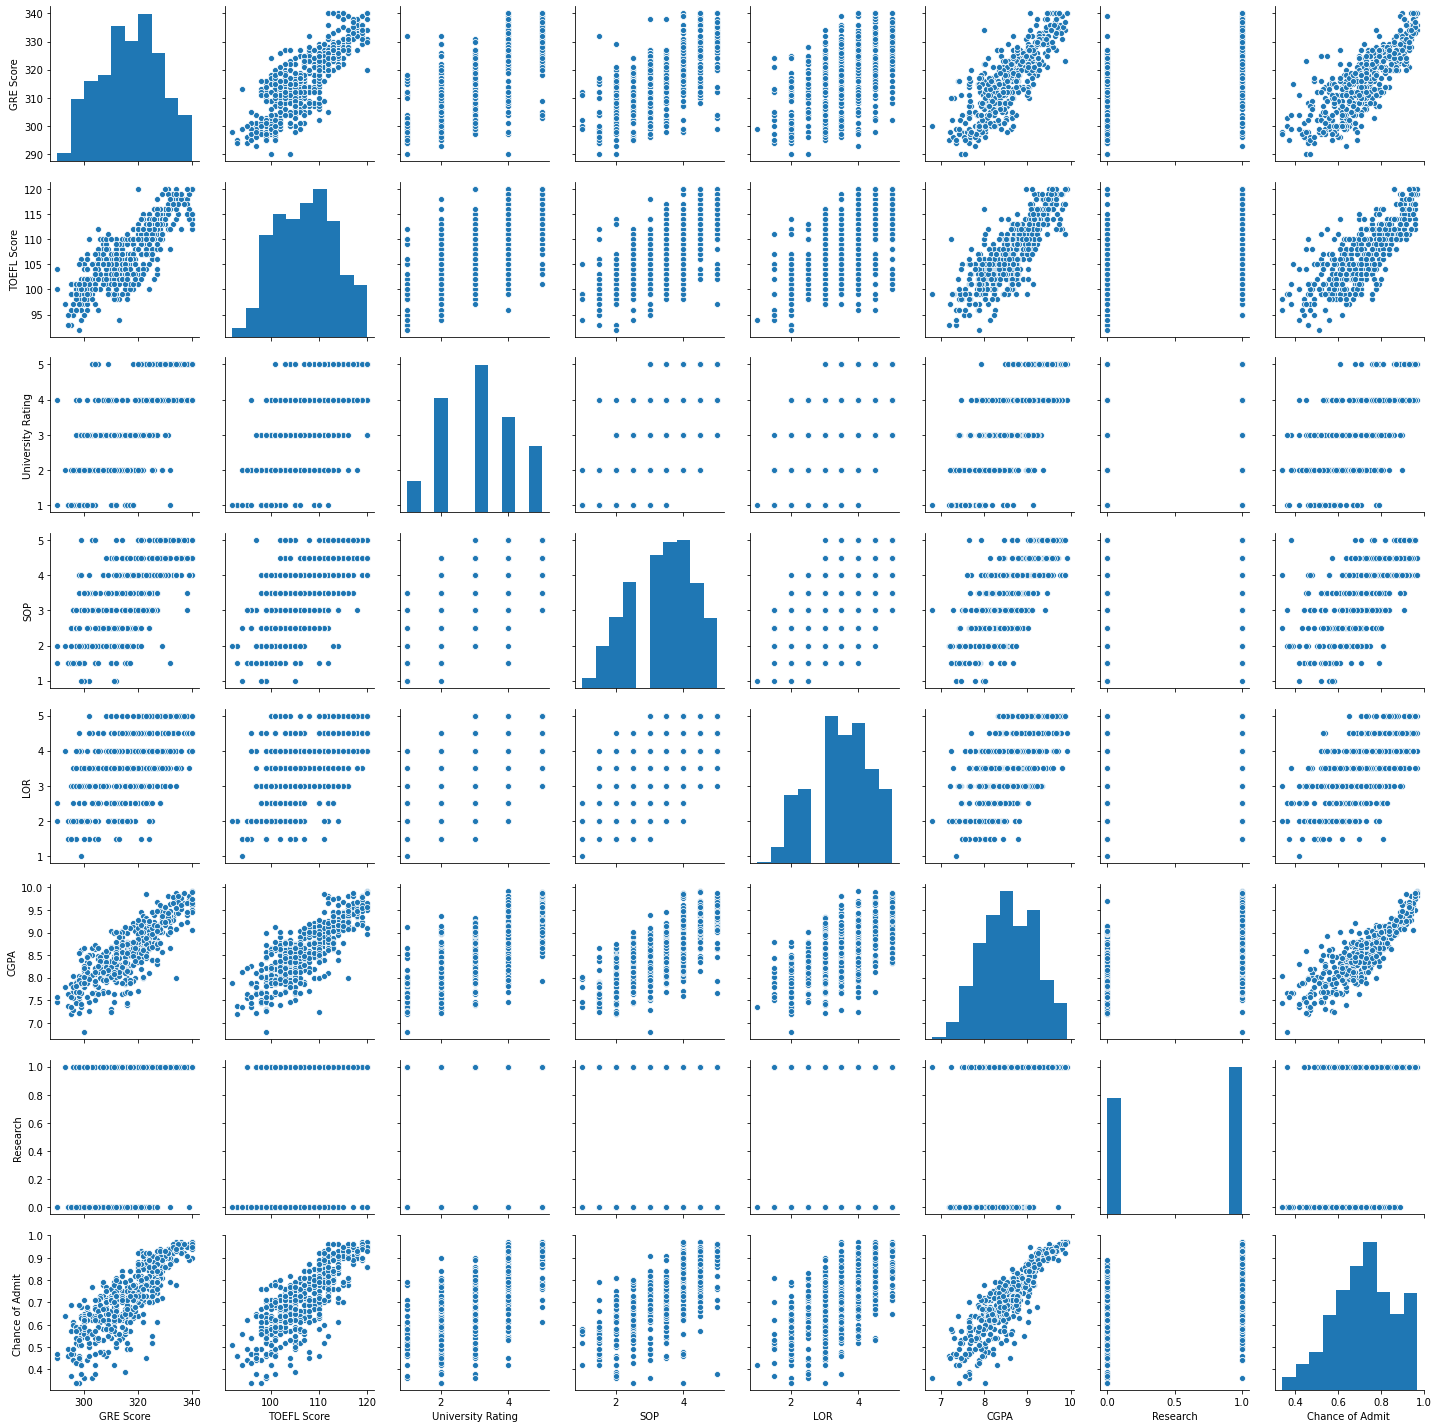

In [10]:
sns.pairplot(admission)

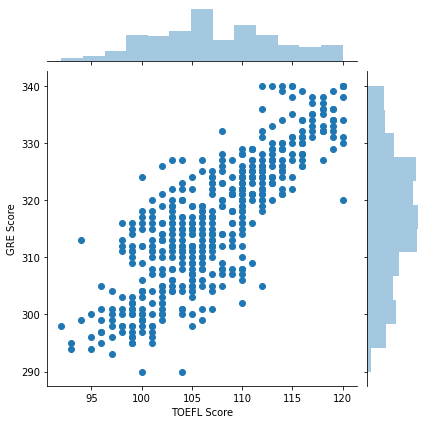

In [11]:
sns.jointplot(x='TOEFL Score', y='GRE Score', data=admission)

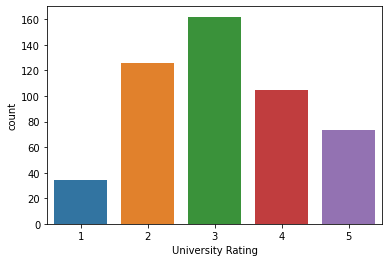

In [12]:
# A large amount of University have a rating of 3

sns.countplot(x='University Rating', data=admission)

Train Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x = admission.drop('Chance of Admit ', axis=1)

In [15]:
y = admission['Chance of Admit ']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

Creating a Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
lm.coef_

array([0.00145221, 0.00302388, 0.00809642, 0.00672185, 0.01318406,
       0.12002891, 0.02477235])

In [21]:
coeff = pd.DataFrame(lm.coef_, x.columns, columns=['Coefficient'])

This dataframe shows the coefficient of each column on the actual result.

For Exmaple:
If all other are kept constant, the CGPA has an effect of 0.120029 on a student's chance of admission
We can also see that all the columns have a positive effect on a student's chance of admission

In [22]:
coeff

,Coefficient
GRE Score,0.001452
TOEFL Score,0.003024
University Rating,0.008096
SOP,0.006722
LOR,0.013184
CGPA,0.120029
Research,0.024772


In [23]:
#Time to make predictions

predictions = lm.predict(x_test)

Visualizing our Results to see how well our model performed

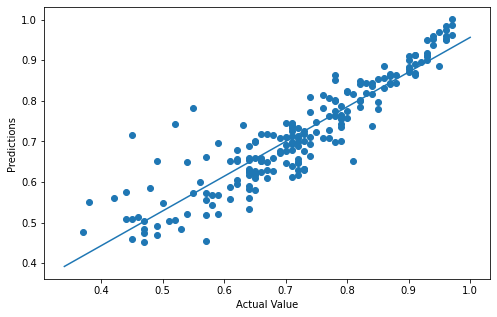

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions)

plt.xlabel('Actual Value')
plt.ylabel('Predictions')

#Add regression line
axes = plt.gca()
m, b = np.polyfit(y_test, predictions, 1)
x_plot = np.linspace(axes.get_xlim()[0], axes.get_xlim()[1], 100)

plt.plot(plot, m*x_plot+b, '-')


#Here we can see an almost perfect linear plot which shows that our model did pretty good

In [26]:
error = y_test - predictions

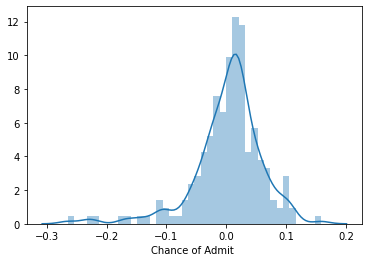

In [27]:
#This is to show a standard normal distribution of the error in our model's prediction

sns.distplot(error, bins=40)

Here we can see that our errors are normally distributed over the zero mark. Which means on the average our model did quite well

In [28]:
from sklearn import metrics 

In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.040863026847933644
Mean Squared Error: 0.003390005695179663
Root Mean Squared Error: 0.058223755419756835
